In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.utils import resample

In [196]:
def split_X_y(X_y):
    X = X_y[:, 0].reshape(1, -1)
    y = X_y[:, 1].reshape(1, -1)
    return X, y

def calculate_alpha(X, y):
    var_X = np.var(X)
    var_y = np.var(y)
    cov_X_y = np.cov(X, y)
    
    alpha = (var_y - cov_X_y) / (var_X + var_y - 2 * cov_X_y)
    return alpha[0, 1]

def pipe(X_y):
    # split into 1000 samples that each contain 100 X y pairs
    samples = np.split(X_y, indices_or_sections=1000, axis=0) 
    
    # split X and y's 
    samples = [split_X_y(sample) for sample in samples]
    
    # calculate fraction (alpha) allocated to X for each sample
    alpha = [calculate_alpha(sample[0], sample[1]) for sample in samples]
    alpha = np.array(alpha)
    return alpha, samples

def preprocess_alpha(alpha, fill):
    # reshape and label
    preprocessed_alpha = np.c_[
        alpha, 
        np.full_like(alpha, fill_value=fill)
    ]
    return preprocessed_alpha

In [115]:
# generate 100000 pairs of observations
X_y_mean = [0, 0]
X_y_cov = np.array(([1, 0.5], [0.5, 1.25]))
X_y = np.random.multivariate_normal(mean=X_y_mean, cov=X_y_cov, size=100000)

In [147]:
alpha, samples = pipe(X_y)

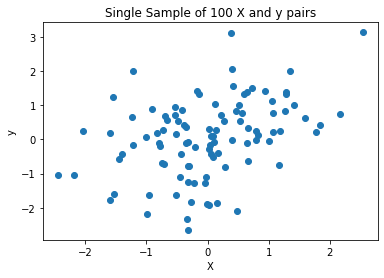

In [124]:
X_sample, y_sample = samples[0][0], samples[0][1]
plt.scatter(X_sample, y_sample)
plt.title('Single Sample of 100 X and y pairs')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [182]:
# bootstrap sampling
original_data = pd.DataFrame({
    'observation': np.arange(1, 101),
    'X': X_sample.flatten(),
    'y': y_sample.flatten()
})
bootstrap_data = resample(original_data, n_samples=100000)
bootstrap_X_y = bootstrap_data[['X', 'y']].to_numpy()
bootstrap_alpha, _ = pipe(bootstrap_X_y)

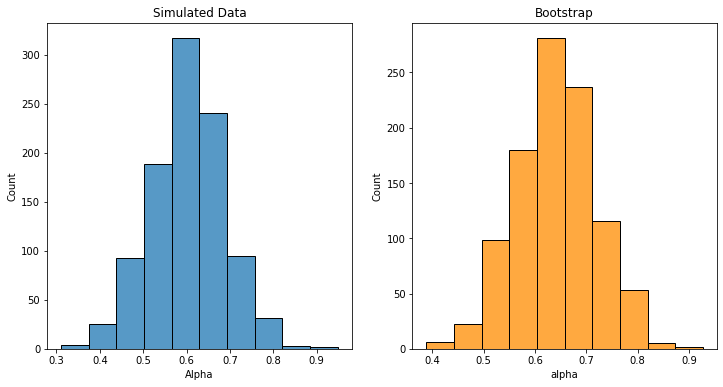

In [218]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2)

hist = sns.histplot(alpha, bins=10, ax=ax1)
hist.set(title='Simulated Data', xlabel='Alpha')

bootstrap_hist = sns.histplot(
    bootstrap_alpha, 
    bins=10, 
    color='darkorange', 
    ax=ax2
)
bootstrap_hist.set(title='Bootstrap', xlabel='alpha')
plt.show()

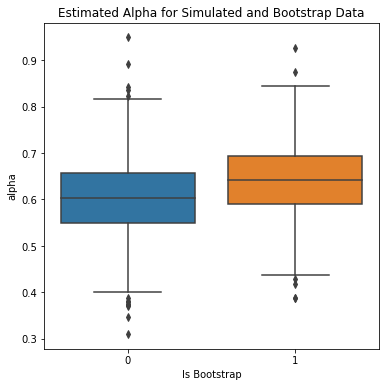

In [216]:
preprocessed_alpha = preprocess_alpha(alpha, 0)
preprocessed_bootstrap_alpha = preprocess_alpha(bootstrap_alpha, 1)

alphas = np.vstack([preprocessed_alpha, preprocessed_bootstrap_alpha])
alphas = pd.DataFrame(alphas, columns=['alpha', 'is_bootstrap'])
alphas['is_bootstrap'] = alphas['is_bootstrap'].astype(int)

plt.figure(figsize=(6, 6))
alpha_boxplot = sns.boxplot(data=alphas, x='is_bootstrap', y='alpha')
alpha_boxplot.set(
    title='Estimated Alpha for Simulated and Bootstrap Data',
    xlabel='Is Bootstrap'
)
plt.show()